# Data Project - Stock Market Analysis and Prediction

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. We will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a GRU method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using GRU)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [93]:
!pip install -q yfinance

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

In [95]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-22,185.000000,185.059998,182.479996,182.550003,182.550003,39931900,AMAZON
2024-07-23,184.100006,189.389999,183.559998,186.410004,186.410004,47537700,AMAZON
2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,AMAZON
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,AMAZON
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,AMAZON
2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,AMAZON
2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,AMAZON
2024-07-31,185.050003,187.940002,184.460007,186.979996,186.979996,41667300,AMAZON
2024-08-01,189.289993,190.600006,181.869995,184.070007,184.070007,70435600,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [96]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,187.134801,188.787342,185.532341,187.177659,186.797628,6.075989e+07
std,16.089991,16.286623,15.695987,15.981177,16.124593,2.469613e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801846,4.743290e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502808,5.430360e+07
75%,192.592503,194.017498,191.494999,192.660000,192.398209,6.608052e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


We have only 255 records in one year because weekends are not included in the data.

## Information about the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [97]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-03 to 2024-08-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


# Exploratory Data Analysis and Visualization

## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [164]:
# Create a subplot with 2 rows and 2 columns
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f"Closing Price of {name}" for name in company_name]
)

# Plot each company's data
for i, (company, com_name) in enumerate(zip(company_list, company_name), start=1):
    fig.add_trace(
        go.Scatter(
            x=company.index,
            y=company['Adj Close'],
            mode='lines',
            name=com_name
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

# Update layout to use plotly_dark template and customize gridlines
fig.update_layout(
    title={
        'text': 'Historical Closing Prices of Tech Stocks',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
    template='plotly_dark',
    height=800,
    width=1200,
    showlegend=False,
    margin=dict(l=80, r=20, t=90, b=40)  # Add margins for spacing
)

# Customize grid lines and zero lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',
    griddash='dash',
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='white',
    tickfont=dict(size=11)
)

fig.update_xaxes(
    showgrid=False,
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='white',
    tickfont=dict(size=11)
)

# Adjust title standoff (this doesn't apply directly to tick labels)
fig.update_layout(
    yaxis_title_standoff=20,  # Increases the space between the y-axis title and the plot
    xaxis_title_standoff=20  # Increases the space between the x-axis title and the plot
)

# Show the interactive plot
fig.show()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

In [163]:
# Create a subplot with 2 rows and 2 columns for trading volume
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f"Trading Volume for {name}" for name in company_name]
)

# Plot each company's trading volume data
for i, (company, com_name) in enumerate(zip(company_list, company_name), start=1):
    fig.add_trace(
        go.Bar(
            x=company.index,
            y=company['Volume'],
            name=com_name,
            marker=dict(color='seagreen')  # Color customization
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

# Update layout to use plotly_dark template and customize gridlines
fig.update_layout(
    title={
        'text': 'Daily Trading Volume of Tech Stocks',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
    template='plotly_dark',
    height=800,
    width=1200,
    showlegend=False
)

# Customize y-axis and x-axis grid lines and zero lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',
    griddash='dash',
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='white',
    tickfont=dict(size=11),
    title='Volume'
)

fig.update_xaxes(
    showgrid=False,
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='white',
    tickfont=dict(size=11),
    title='Date'
)

# Show the interactive plot
fig.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [100]:
# Calculate Moving Averages
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create a subplot with 2 rows and 2 columns for moving averages
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f"Moving Averages for {name}" for name in company_name]
)

# Plot each company's moving averages and actual adjusted close price
for i, (company, com_name) in enumerate(zip(company_list, company_name), start=1):
    fig.add_trace(
        go.Scatter(
            x=company.index,
            y=company['Adj Close'],
            mode='lines',
            name=f"{com_name} Adj Close",
            line=dict(color='skyblue', width=2)  # Styling for actual price line
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )
    fig.add_trace(
        go.Scatter(
            x=company.index,
            y=company['MA for 10 days'],
            mode='lines',
            name=f"{com_name} 10-day MA",
            line=dict(color='orange', width=2, dash='dot')  # Styling for 10-day MA line
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )
    fig.add_trace(
        go.Scatter(
            x=company.index,
            y=company['MA for 20 days'],
            mode='lines',
            name=f"{com_name} 20-day MA",
            line=dict(color='green', width=2, dash='dash')  # Styling for 20-day MA line
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )
    fig.add_trace(
        go.Scatter(
            x=company.index,
            y=company['MA for 50 days'],
            mode='lines',
            name=f"{com_name} 50-day MA",
            line=dict(color='red', width=2, dash='dot')  # Styling for 50-day MA line
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

# Update layout to use plotly_dark template and customize gridlines
fig.update_layout(
    title={
        'text': 'Historical Closing Prices of Tech Stocks',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
    template='plotly_dark',
    height=800,
    width=1200,
    showlegend=True
)

# Customize y-axis and x-axis grid lines and zero lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',
    griddash='dash',
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='lightgrey',
    tickfont=dict(size=11),
    title='Price'
)

fig.update_xaxes(
    showgrid=False,
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='lightgrey',
    tickfont=dict(size=11),
    title='Date'
)

# Show the interactive plot
fig.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [102]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create a subplot with 2 rows and 2 columns for daily returns
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f"Daily Return for {name}" for name in company_name]
)

# Plot each company's daily return
for i, (company, com_name) in enumerate(zip(company_list, company_name), start=1):
    fig.add_trace(
        go.Scatter(
            x=company.index,
            y=company['Daily Return'],
            mode='lines',
            name=f"{com_name} Daily Return",
            line=dict(width=1.5),
            marker=dict(size=4, symbol='circle')
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

# Update layout to use plotly_white template and customize gridlines
fig.update_layout(
    title={
        'text': 'Daily Returns of Tech Stocks',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
    template='plotly_dark',
    height=800,
    width=1200,
    showlegend=False
)

# Customize y-axis and x-axis grid lines and zero lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',
    griddash='dash',
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='lightgrey',
    tickfont=dict(size=11),
    title='Daily Return (%)'
)

fig.update_xaxes(
    showgrid=False,
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor='lightgrey',
    tickfont=dict(size=11),
    title='Date'
)

# Show the interactive plot
fig.show()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

In [103]:
# Create a subplot with 2 rows and 2 columns for daily returns
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[f"Daily Return Distribution for {name}" for name in company_name]
)

# Plot histograms for each company's daily return
for i, (company, com_name) in enumerate(zip(company_list, company_name), start=1):
    fig.add_trace(
        go.Histogram(
            x=company['Daily Return'].dropna(),  # Drop NaN values for plotting
            nbinsx=50,  # Number of bins
            name=com_name,
            marker=dict(color='skyblue', line=dict(color='black', width=1))
        ),
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

# Update layout to use plotly_white template and customize gridlines
fig.update_layout(
    title={
        'text': 'Histograms of Daily Returns for Tech Stocks',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title at the center
    },
    template='plotly_dark',
    height=800,
    width=1200,
    showlegend=False
)

# Customize y-axis and x-axis grid lines
fig.update_yaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',
    griddash='dash',
    title='Counts'
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',
    griddash='dash',
    title='Daily Return'
)

# Show the interactive plot
fig.show()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [104]:
# Fetch data using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate daily returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns DataFrame
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-08-03,NaN,NaN,NaN,NaN
2023-08-04,-0.048020,0.082693,-0.001786,0.003429
2023-08-07,-0.017254,0.018987,0.026451,0.007108
2023-08-08,0.005312,-0.016031,-0.000758,-0.012299
2023-08-09,-0.008954,-0.014935,-0.012819,-0.011716


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

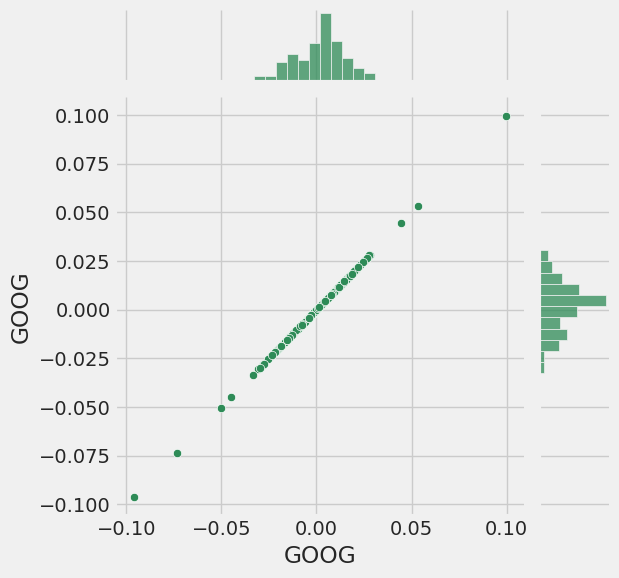

In [105]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

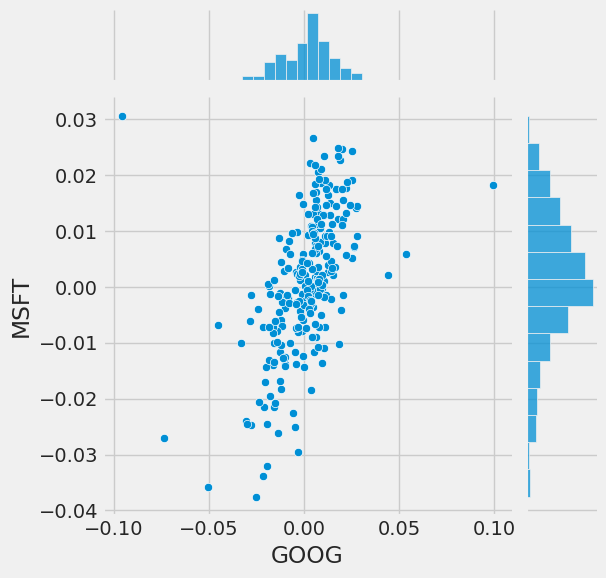

In [106]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

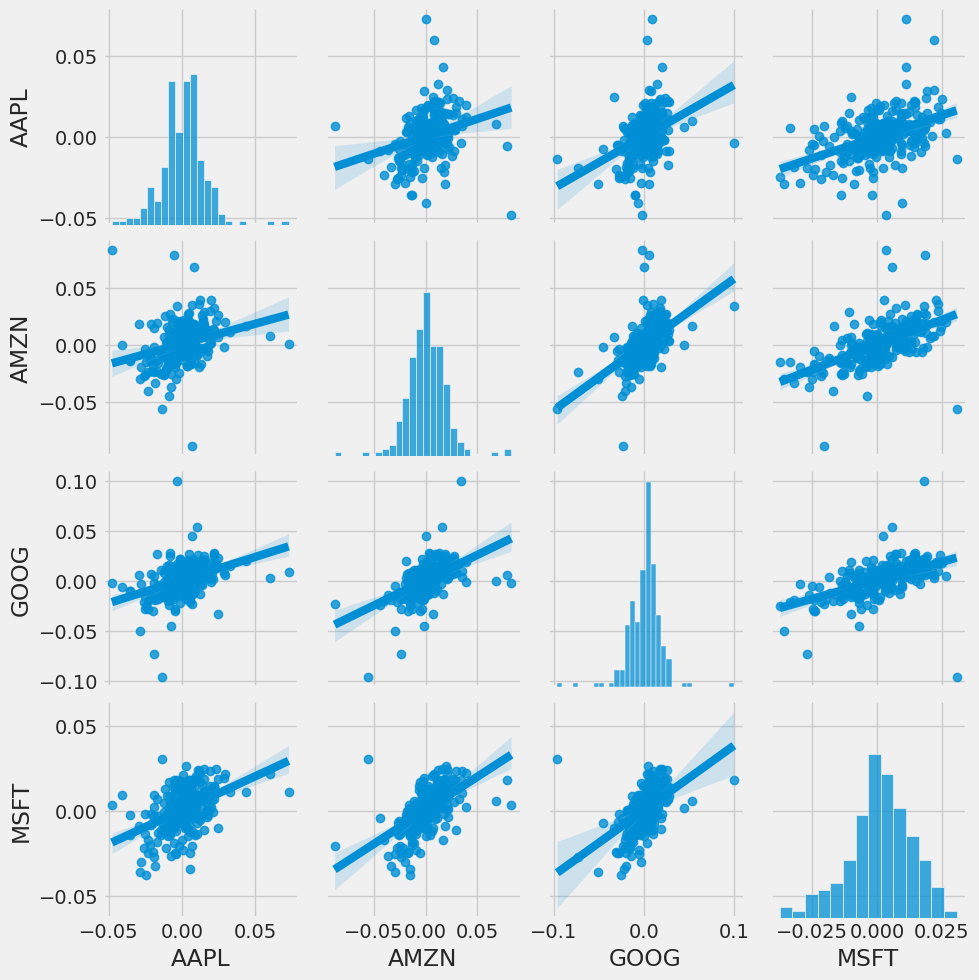

In [107]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

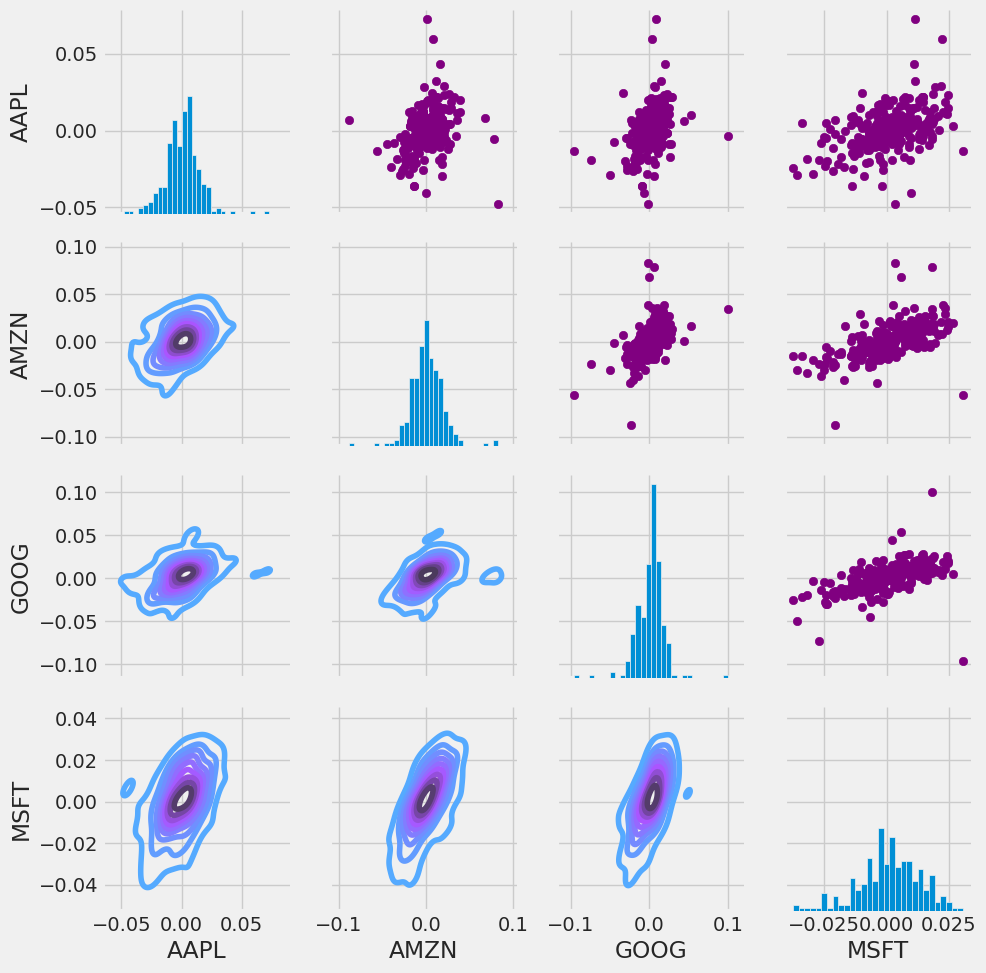

In [108]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

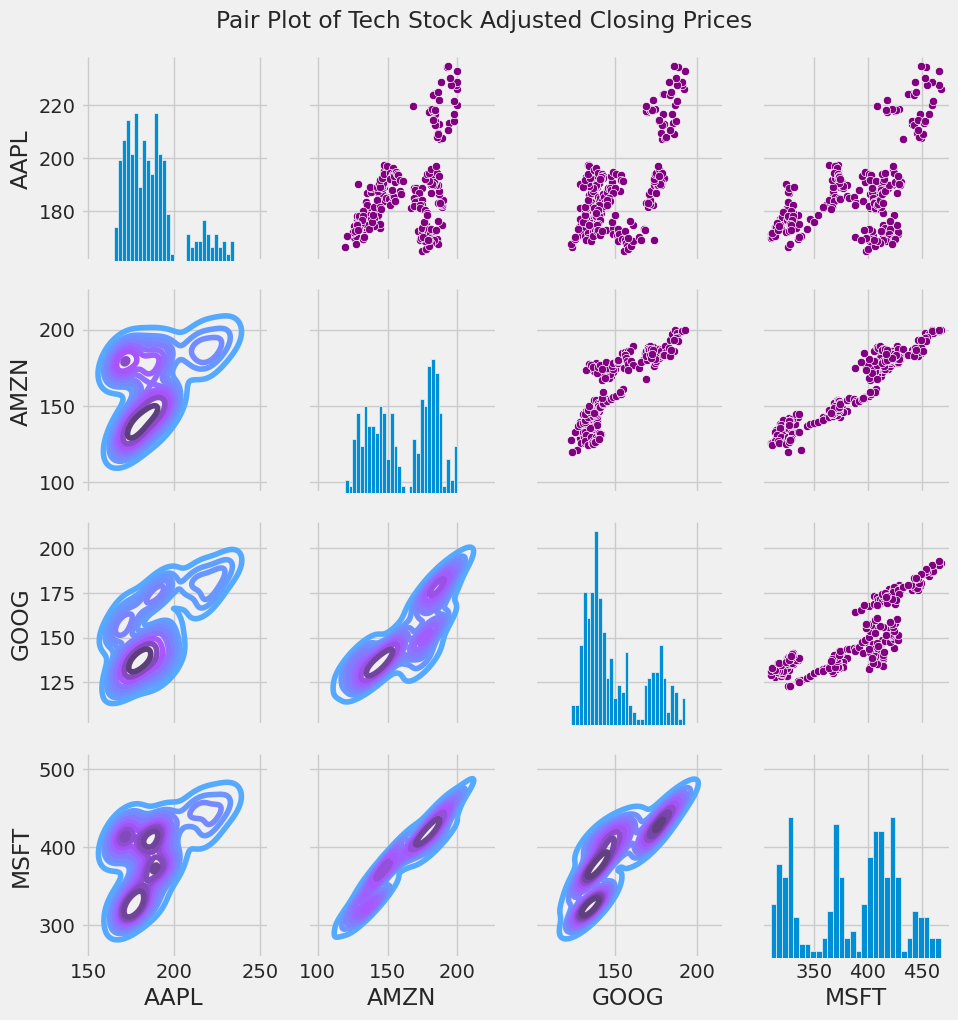

In [109]:
# Create a PairGrid with Seaborn
returns_fig = sns.PairGrid(closing_df)

# Define the appearance of the upper triangle with scatter plots
returns_fig.map_upper(sns.scatterplot, color='purple')

# Define the appearance of the lower triangle with KDE plots
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal with histograms
returns_fig.map_diag(plt.hist, bins=30)

# Set titles and labels for the plots
returns_fig.fig.suptitle('Pair Plot of Tech Stock Adjusted Closing Prices', y=1.02)
# Show the plot
plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

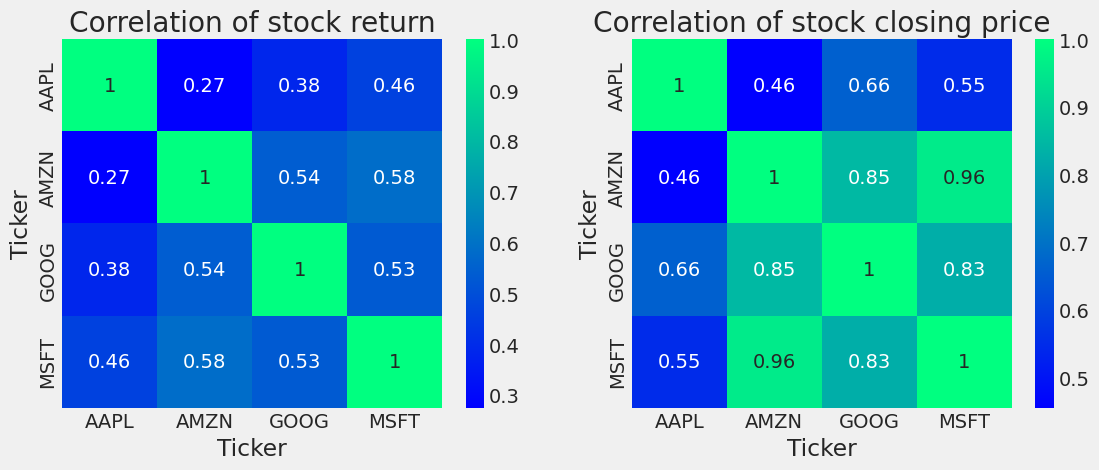

In [110]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

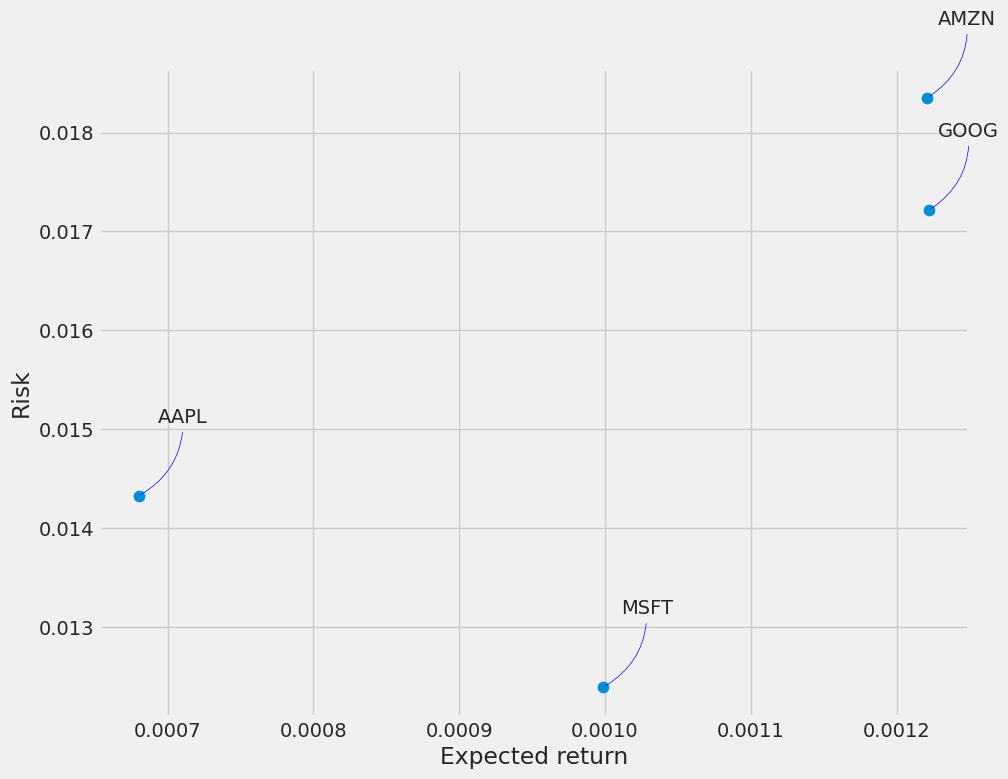

In [111]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc.

In [112]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416983,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483714,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622309,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754256,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400
...,...,...,...,...,...,...
2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800
2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300


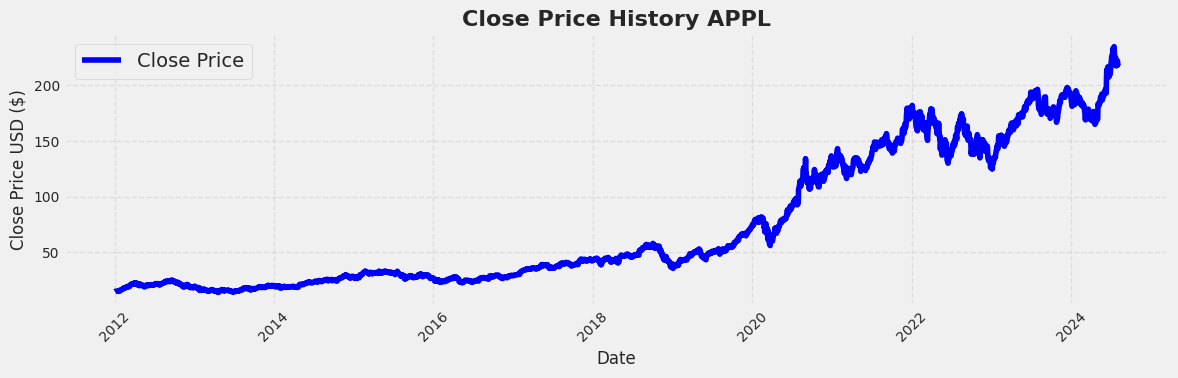

In [162]:
# Create the figure and axis
plt.figure(figsize=(12, 4), dpi=100)

# Plot the closing prices
plt.plot(df.index, df['Close'], color='blue', label='Close Price')

# Title and labels
plt.title('Close Price History APPL', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)

# Enhance grid and ticks
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid with dashed lines
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)  # Adjust y-axis font size

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [114]:
data = df.filter(['Close'])

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2024-07-29,218.240005
2024-07-30,218.800003
2024-07-31,222.080002


# Scaling Target (Normalization Process)

In [116]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
    scaler = MinMaxScaler()
    data['Close'] = scaler.fit_transform(data[['Close']])
    return data, scaler

df_norm, scaler = normalize_data(data)
df_norm.shape

(3166, 1)

# Train/Test Split

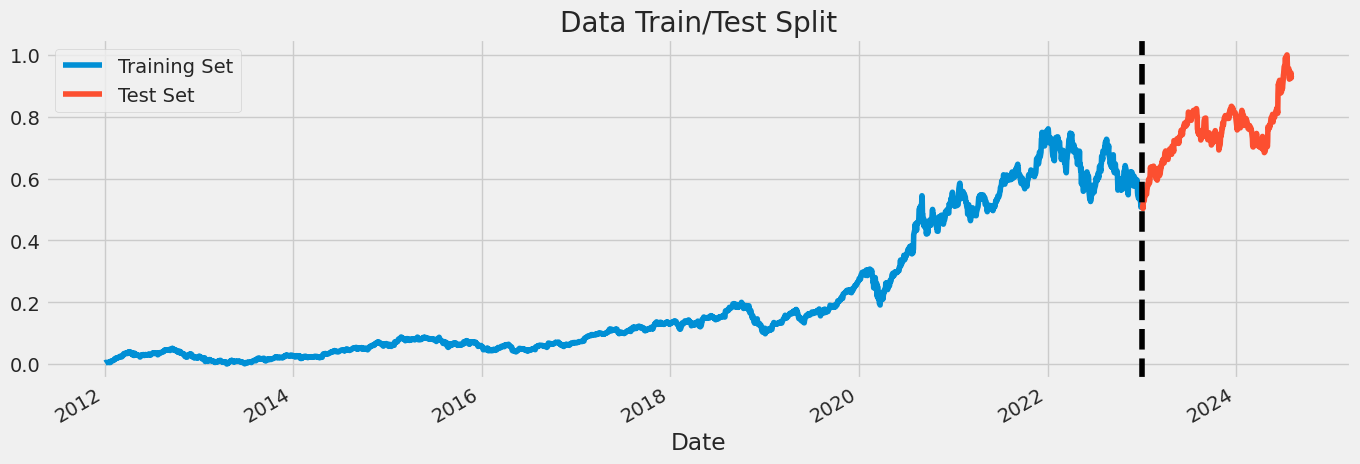

In [120]:
split_date = '2023-01-01'

appl_train = df_norm.loc[df_norm.index <= split_date].copy()
appl_test = df_norm.loc[df_norm.index > split_date].copy()
# Plot train and test so you can see where we have split

fig, ax = plt.subplots(figsize=(15, 5))
appl_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
appl_test.plot(ax=ax, label='Test Set')
ax.axvline('2023-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Prepare Data for Training the GRU

In [121]:
def load_data(data, seq_len):
    X_train, y_train = [], []

    # Generate training data
    for i in range(seq_len, len(data)):
        X_train.append(data.iloc[i - seq_len : i, 0].values)
        y_train.append(data.iloc[i, 0])

    # Split into train and test sets
    X_test, y_test = X_train[2500:], y_train[2500:]
    X_train, y_train = X_train[:2500], y_train[:2500]

    # Convert to numpy arrays
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape data for RNN/LSTM input
    X_train = X_train.reshape((X_train.shape[0], seq_len, 1))
    X_test = X_test.reshape((X_test.shape[0], seq_len, 1))

    return X_train, y_train, X_test, y_test

In [122]:
seq_len = 20

# Let's create train, test data
X_train, y_train, X_test, y_test = load_data(data, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (2500, 20, 1)
y_train.shape =  (2500,)
X_test.shape =  (646, 20, 1)
y_test.shape =  (646,)


* The 'seq_len' parameter determines how far back the model will look at
historical data, helping the model to capture time dependencies in a memory-aware way.
* We should note that if "seq_len" is too large, the model can become complex and prone to overlearning.

# Building GRU model

In [123]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout

# Build the LSTM model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 20, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,777 (358.50 KB)

 Trainable params: 91,777 (358.50 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
from keras.optimizers import Adam

# Define optimizer
optimizer = Adam(learning_rate=0.001)

# Compile GRU model
model.compile(optimizer=optimizer, loss="mean_squared_error")

# Define hyperparameters
epochs = 15
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 5.8294e-04 - val_loss: 2.8876e-04
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.0656e-04 - val_loss: 5.8746e-04
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 3.6778e-04 - val_loss: 1.6356e-04
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.7810e-04 - val_loss: 1.4304e-04
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.8706e-04 - val_loss: 2.1200e-04
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 2.3558e-04 - val_loss: 0.0018
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 2.2724e-04 - val_loss: 2.0840e-04
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.1269e-04 - val_loss: 2.0572e-04
Epoch 9/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.6618e-04 - val_loss: 1.6260e-04
Epoch 10/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.2432e-04 - val_loss: 2.0373e-04
Epoch 11/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 2.6817e-04 - 

In [128]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions using the RNN model
gru_predictions = model.predict(X_test)

# Calculate R2 score
gru_r2_score = r2_score(y_test, gru_predictions)
print("R2 Score of GRU model =", gru_r2_score)

# Calculate RMSE
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_predictions))
print("RMSE of GRU model =", gru_rmse)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2 Score of GRU model = 0.9424327592262973
RMSE of GRU model = 0.023110765955736565


In [159]:
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
gru_predictions_inverse = scaler.inverse_transform(gru_predictions).flatten()

# Example dates - replace this with your actual dates
Date = pd.date_range(start='2023-01-01', periods=len(y_test_inverse), freq='D')

# Reverse transform scaler to convert to real values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
gru_predictions_inverse = scaler.inverse_transform(gru_predictions).flatten()

# Create DataFrame with aligned data
results_GRU = pd.DataFrame({
    "Date": Date,
    'Actual': y_test_inverse,
    'Predicted': gru_predictions_inverse
})

# Print the DataFrame
print(results_GRU)

          Date      Actual   Predicted
0   2023-01-01  172.000000  180.952728
1   2023-01-02  172.169998  177.501236
2   2023-01-03  172.190002  176.522537
3   2023-01-04  175.080002  176.387100
4   2023-01-05  175.529999  178.430145
..         ...         ...         ...
641 2024-10-03  218.240005  223.385925
642 2024-10-04  218.800003  223.648117
643 2024-10-05  222.080002  224.170059
644 2024-10-06  218.360001  226.700790
645 2024-10-07  219.860001  224.915009

[646 rows x 3 columns]


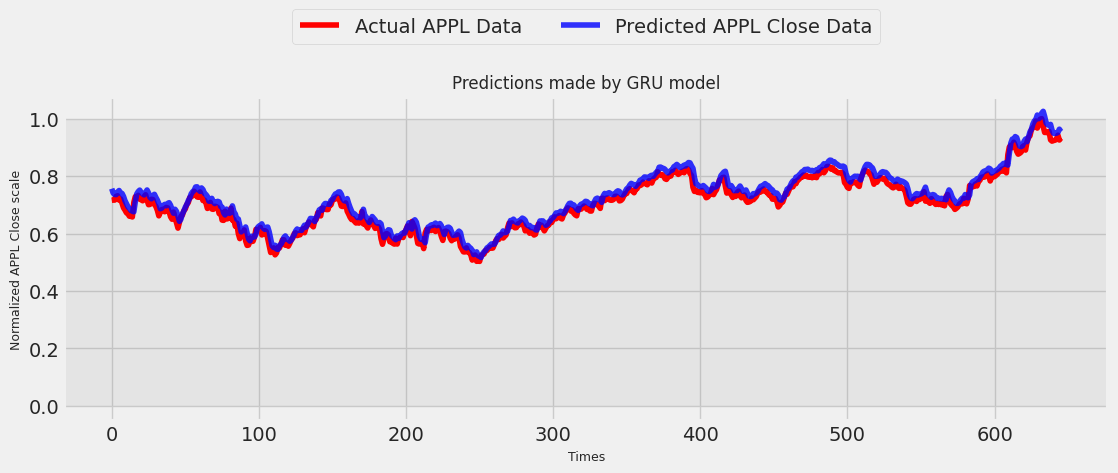

In [158]:
plt.figure(figsize=(12, 4),dpi=100)

# Plot actual and predicted power consumption data
plt.plot(y_test, color='red', label='Actual APPL Data')
plt.plot(gru_predictions, alpha=0.8, color='blue', label='Predicted APPL Close Data')

# Add a shaded region for better visualization of scale
plt.axhspan(0, 1, facecolor='gray', alpha=0.1)

# Add title and labels with smaller font sizes
plt.title("Predictions made by GRU model", fontsize=12)
plt.xlabel('Times', fontsize=9)
plt.ylabel('Normalized APPL Close scale', fontsize=9)

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

# Show plot
plt.show()

# The End

# Depreciate Second Approach

In [71]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3008

In [72]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.94231964],
       [0.92547734],
       [0.93226859]])

In [73]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2948/2948 ━━━━━━━━━━━━━━━━━━━━ 159s 52ms/step - loss: 0.0011


In [91]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


3.9738233302489014

In [92]:
import plotly.graph_objects as go
import plotly.io as pio

# Set the Plotly template to 'plotly_dark'
pio.templates.default = 'plotly_dark'

# Prepare data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Create traces for each plot element
train_trace = go.Scatter(
    x=train.index,
    y=train['Close'],
    mode='lines',
    name='Train',
    line=dict(color='cyan', width=2)  # Changed color to contrast with dark background
)

valid_trace = go.Scatter(
    x=valid.index,
    y=valid['Close'],
    mode='lines',
    name='Val',
    line=dict(color='lightgreen', width=2)  # Changed color to contrast with dark background
)

predictions_trace = go.Scatter(
    x=valid.index,
    y=valid['Predictions'],
    mode='lines',
    name='Predictions',
    line=dict(color='red', width=2)  # Changed color to contrast with dark background
)

# Create the figure
fig = go.Figure()

# Add the traces
fig.add_trace(train_trace)
fig.add_trace(valid_trace)
fig.add_trace(predictions_trace)

# Update layout for titles and axis
fig.update_layout(
    title='Model Predictions vs. Actual Data',
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    template='plotly_dark',  # Apply dark theme
    height=600,
    width=1000,
    legend=dict(
        x=0.5,  # Horizontal center
        y=1.1,  # Above the plot
        xanchor='center',  # Center horizontally
        yanchor='bottom',  # Bottom of the legend box
        orientation='h'  # Horizontal legend
    ),
    margin=dict(l=50, r=50, t=100, b=100)  # Adjust margins for better spacing
)

# Customize gridlines
fig.update_yaxes(
    showgrid=True,
    gridwidth=0.1,
    gridcolor='lightgrey',  # Light gridlines for visibility on dark background
    griddash='dash'
)

# Customize x-axis to handle date formatting if necessary
fig.update_xaxes(
    tickformat='%Y-%m-%d',  # Format for date display
    tickangle=10  # Rotate x-axis labels for better readability
)

# Show the plot
fig.show()

<ipython-input-92-a5e77ec3ae2f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-12-15,197.570007,191.023224
2023-12-18,195.889999,191.664154
2023-12-19,196.940002,191.785400
2023-12-20,194.830002,191.878525
2023-12-21,194.679993,191.552536
...,...,...
2024-07-29,218.240005,213.658356
2024-07-30,218.800003,212.835205
2024-07-31,222.080002,212.461731
